In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith('.png'):
            continue
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/azerbaijani-traffic-sings/data/label_names.csv
/kaggle/input/azerbaijani-traffic-sings/data/train/78/.ipynb_checkpoints/Untitled-checkpoint.ipynb
/kaggle/input/azerbaijani-traffic-sings/data/train/80/.ipynb_checkpoints/Untitled-checkpoint.ipynb


In [2]:
cd /kaggle/input/azerbaijani-traffic-sings/data/

/kaggle/input/azerbaijani-traffic-sings/data


In [3]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
from PIL import Image
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

In [4]:
path = "train"
labelFile = 'label_names.csv' 
batch_size_val=50
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.2   
validationRatio = 0.2

In [ ]:
pwd

In [5]:
# Importing Images
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        if y.endswith('.png'):
            try:
                image = Image.open(path+"/"+str(count)+"/"+y)
                image = image.resize((32,32))
                image = np.array(image)
                if image.shape != (32, 32, 3):
                    continue
                images.append(image)
                classNo.append(count)
            except Exception as e:
                print(e)
    print(count, end =" ")
    count +=1
print(" ")

Total Classes Detected: 81
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80  


In [6]:
images_new = np.array(images)
classNo_new = np.array(classNo)

In [7]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(images_new, classNo_new, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [8]:
# Checking if the shapes match
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

Data Shapes
Train(36016, 32, 32, 3) (36016,)
Validation(9005, 32, 32, 3) (9005,)
Test(11256, 32, 32, 3) (11256,)


In [9]:
# CSV of Class Names
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (81, 2) <class 'pandas.core.frame.DataFrame'>


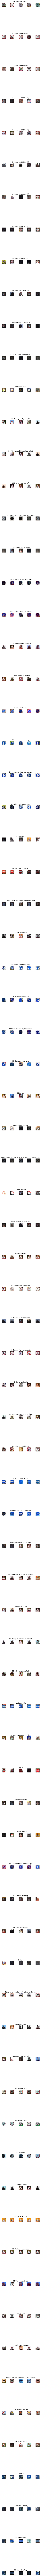

In [10]:
# Showing Some Samples from Dataset
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["SignName"])
            num_of_samples.append(len(x_selected))

[101, 17, 601, 1524, 1211, 1607, 959, 1325, 1267, 925, 869, 253, 1370, 383, 125, 269, 147, 512, 30, 1620, 206, 128, 197, 1156, 650, 92, 1506, 1322, 490, 55, 104, 449, 584, 282, 1558, 145, 150, 1613, 1291, 399, 20, 285, 45, 49, 160, 149, 101, 44, 390, 39, 88, 220, 113, 80, 54, 828, 424, 477, 26, 159, 826, 1381, 592, 778, 425, 89, 7, 17, 27, 9, 8, 18, 43, 6, 24, 51, 48, 44, 127, 125, 128]


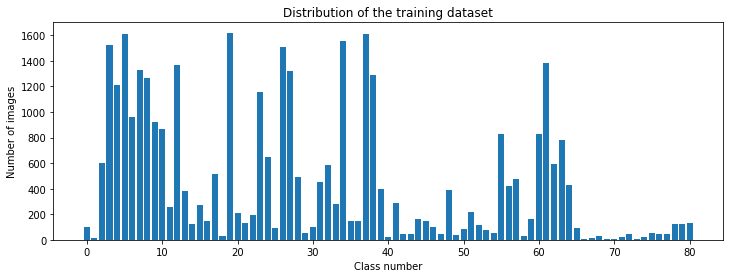

In [11]:
# Bar Chart Showing The number of Classes
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [12]:
# Preprocessing functions
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)     
    img = img/255         
    return img
 
# Preprocessing all images
X_train_new=np.array(list(map(preprocessing,X_train)))  
X_validation_new=np.array(list(map(preprocessing,X_validation)))
X_test_new=np.array(list(map(preprocessing,X_test)))

In [ ]:
X_train.shape

In [ ]:
X_train_new.shape

In [13]:
# Adding Depth of 1
X_train=X_train_new.reshape(X_train_new.shape[0],X_train_new.shape[1],X_train_new.shape[2],1)
X_validation=X_validation_new.reshape(X_validation_new.shape[0],X_validation_new.shape[1],X_validation_new.shape[2],1)
X_test=X_test_new.reshape(X_test_new.shape[0],X_test_new.shape[1],X_test_new.shape[2],1)

In [ ]:
X_train.shape

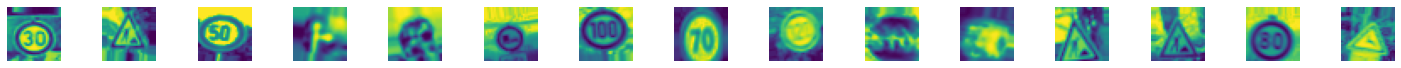

In [14]:
# Image Augumentation
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)
 
# TO SHOW AGMENTED IMAGE SAMPLES
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()
 
 
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)


In [39]:
# CNN
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5) # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
                         # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500   # NO. OF NODES IN HIDDEN LAYERS
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool)) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS
 
    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(noOfClasses,activation='softmax')) # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [42]:
# Training the Model
model = myModel()
print(model.summary())
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),epochs=15,validation_data=(X_validation,y_validation),shuffle=1)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 4, 4, 30)         

In [ ]:
from keras.callbacks import LearningRateScheduler

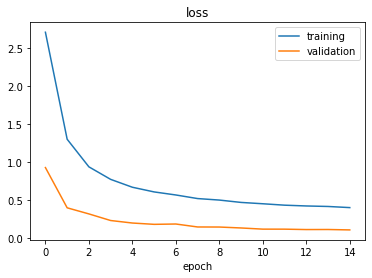

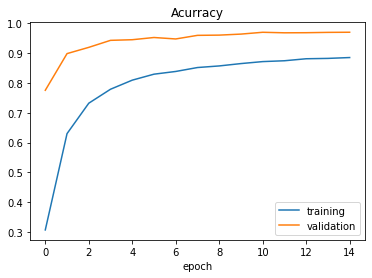

Test Score: 0.09613707661628723
Test Accuracy: 0.9745025038719177


In [43]:
# Accuracy Metrics
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [ ]:
model.save('/kaggle/working/model.h5')